In [37]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from copy import deepcopy

np.set_printoptions(precision=3, suppress=True)

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv("./auto-mpg.data", names=column_names,
                            na_values='?', comment='\t',
                            sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
# Turn last 0/1/2 categorical column in 3 binary columns:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
# dataset.tail()

In [38]:
# Split dataset into training and testing
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

x = train_features.to_numpy()
y = train_labels.to_numpy()
x_test = test_features.to_numpy()
y_test = test_labels.to_numpy()


In [39]:
# See dataset "clouds"
# sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')


1. DNN:

In [40]:
def build_and_compile_model(norm, layers=[64, 64]):
    l = [norm]
    for units in layers:
        l.append(tf.keras.layers.Dense(units=units, activation='relu'))
    l.append(tf.keras.layers.Dense(1))
    model = tf.keras.Sequential(l)
    model.compile(
        loss='mean_absolute_error',
        optimizer=tf.keras.optimizers.Adam(0.001)
    )
    return model


def polynom(inputs: np.ndarray, degree=1):
    assert degree > 0
    if degree == 1:
        return inputs

    transposed = inputs.T
    base = len(transposed)

    pols = []
    newgen = []
    for i in range(base):
        newgen.append([i])
    pols.extend(newgen)

    for deg in range(1, degree):
        lastgen = newgen
        newgen = []
        for p in lastgen:
            for i in range(p[-1], base):
                pnext = [*p, i]
                pnext.sort()
                newgen.append(pnext)
        pols.extend(newgen)

    new_inputs = []
    for p in pols:
        new_inputs.append(deepcopy(transposed[p[0]]))
        for i in p[1:]:
            new_inputs[-1] *= transposed[i]
    return np.array(new_inputs).T


def plot_loss(history: tf.keras.callbacks.History):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)


def fit_with_params(degree=1, layers=[64, 64]):
    xd = polynom(x, degree=degree)
    norm = tf.keras.layers.Normalization(axis=-1)
    norm.adapt(xd)
    net = build_and_compile_model(norm=norm, layers=layers)
    history: tf.keras.callbacks.History = net.fit(
        xd,
        y,
        validation_split=0.2,
        verbose=0, epochs=100)
    xd_test = polynom(x_test, degree=degree)
    mae: float = net.evaluate(xd_test, y_test, verbose=0)
    return history, mae


def plot_losses(histories: list[tf.keras.callbacks.History], titles: list | None = None):
    fig = plt.figure(figsize=(len(histories)*6, 6))
    gs = fig.add_gridspec(1, len(histories))  # hspace=0, wspace=0)
    a = gs.subplots()
    for i in range(len(a)):
        a[i].plot(histories[i].history['loss'], label='loss')
        a[i].plot(histories[i].history['val_loss'], label='val_loss')
        a[i].set_ylim(0, 4)
        a[i].set_xlabel('Epoch')
        a[i].set_ylabel('Error [MPG]')
        a[i].legend()
        a[i].grid(True)
        if titles is not None:
            a[i].set_title(titles[i])
    plt.show()


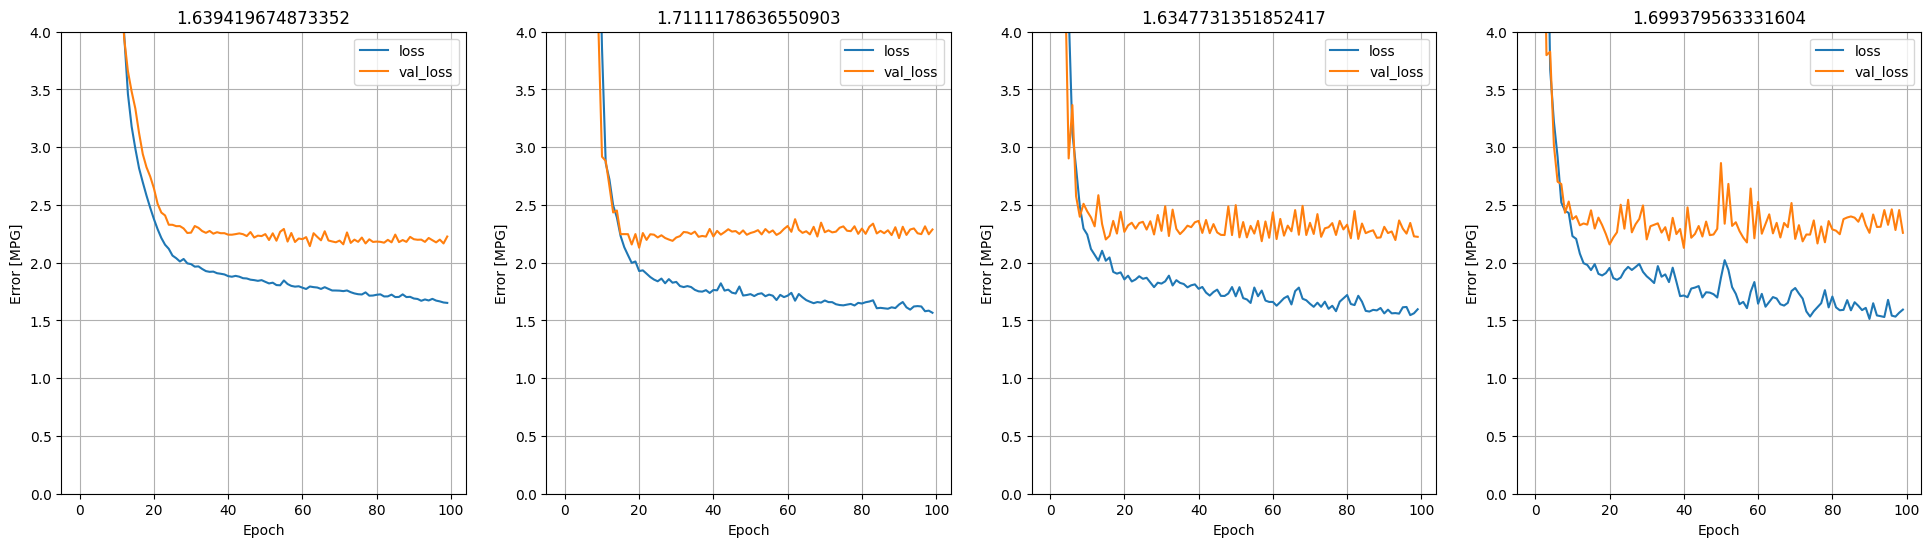

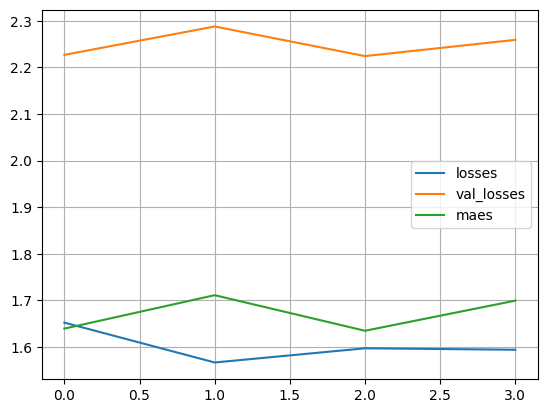

In [41]:
hists = []
maes = []
for degree in [1,2,3,4]:
    hist,mae = fit_with_params(degree=degree)
    hists.append(hist)
    maes.append(mae)
    # print(f"degree {degree} done...")
plot_losses(hists, maes)
losses = []
val_losses = []
for hist in hists:
    losses.append(hist.history['loss'][-1])
    val_losses.append(hist.history['val_loss'][-1])
plt.plot(losses, label="losses")
plt.plot(val_losses, label="val_losses")
plt.plot(maes, label="maes")
plt.legend()
plt.grid(True)
plt.show()

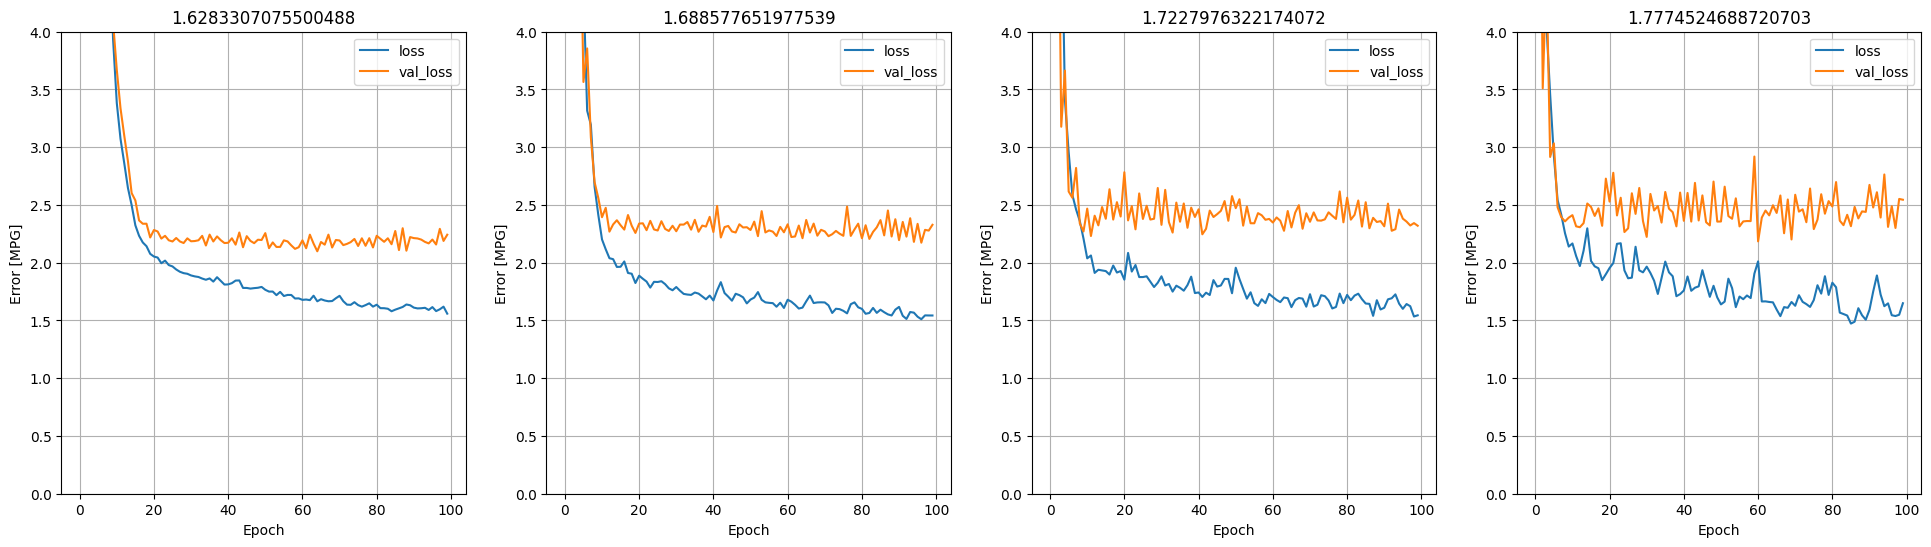

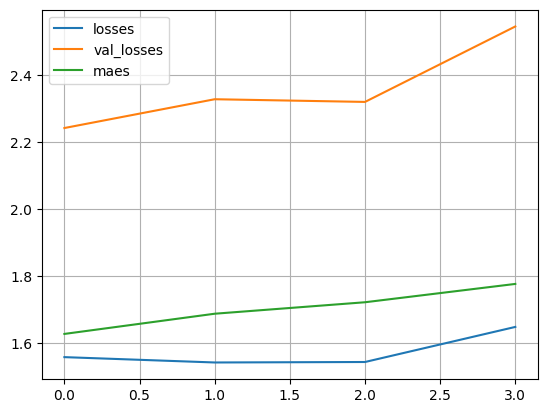

In [42]:
hists = []
maes = []
for degree in [1, 2, 3, 4]:
    hist, mae = fit_with_params(degree=degree, layers=[128,128])
    hists.append(hist)
    maes.append(mae)
    # print(f"degree {degree} done...")
plot_losses(hists, maes)
losses = []
val_losses = []
for hist in hists:
    losses.append(hist.history['loss'][-1])
    val_losses.append(hist.history['val_loss'][-1])
plt.plot(losses, label="losses")
plt.plot(val_losses, label="val_losses")
plt.plot(maes, label="maes")
plt.legend()
plt.grid(True)
plt.show()


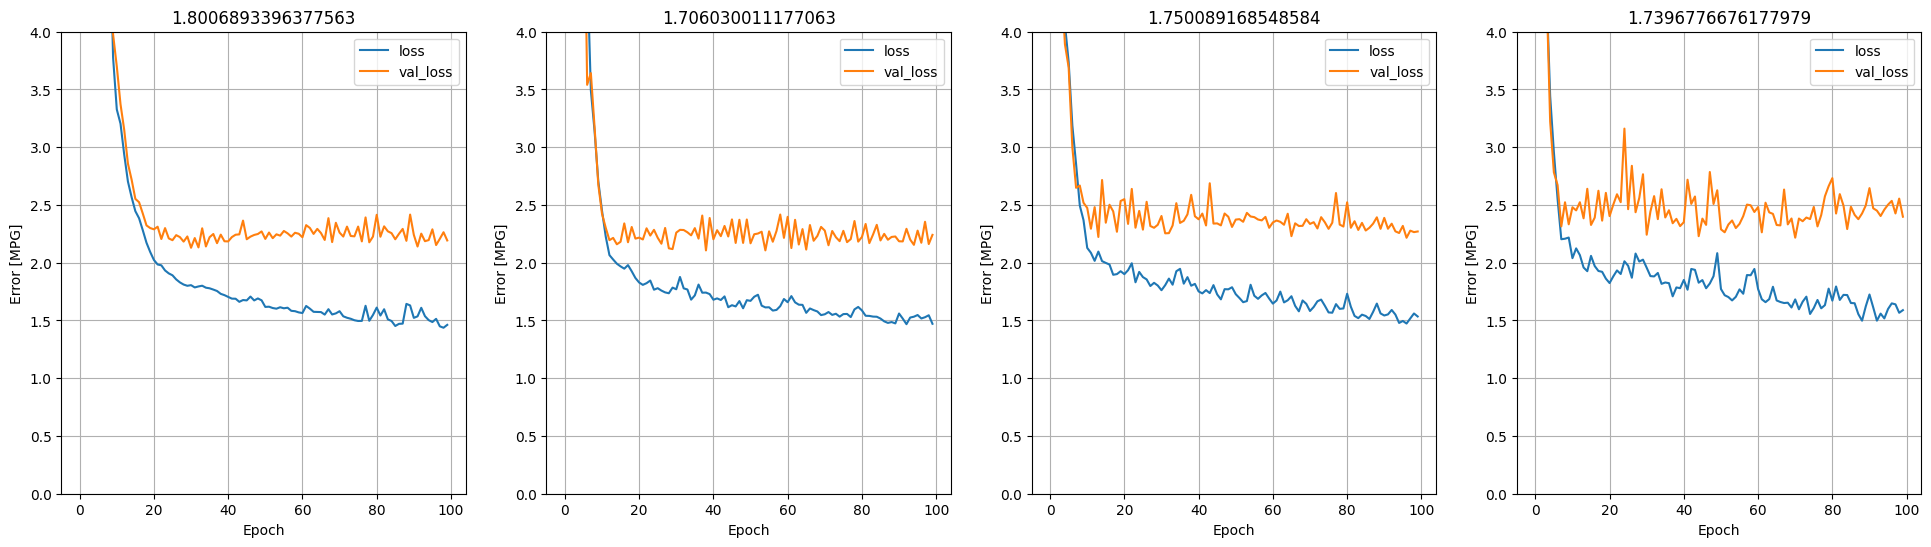

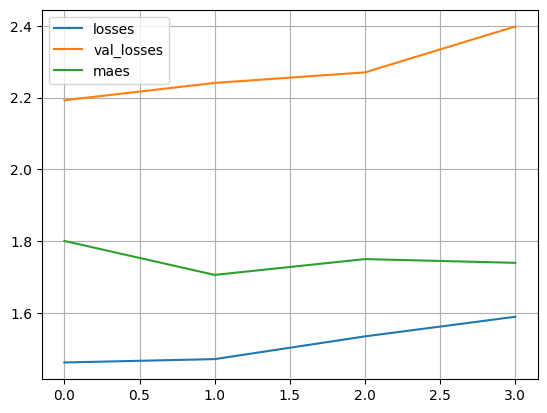

In [43]:
hists = []
maes = []
for degree in [1, 2, 3, 4]:
    hist, mae = fit_with_params(degree=degree, layers=[64,64,64])
    hists.append(hist)
    maes.append(mae)
    # print(f"degree {degree} done...")
plot_losses(hists, maes)
losses = []
val_losses = []
for hist in hists:
    losses.append(hist.history['loss'][-1])
    val_losses.append(hist.history['val_loss'][-1])
plt.plot(losses, label="losses")
plt.plot(val_losses, label="val_losses")
plt.plot(maes, label="maes")
plt.legend()
plt.grid(True)
plt.show()


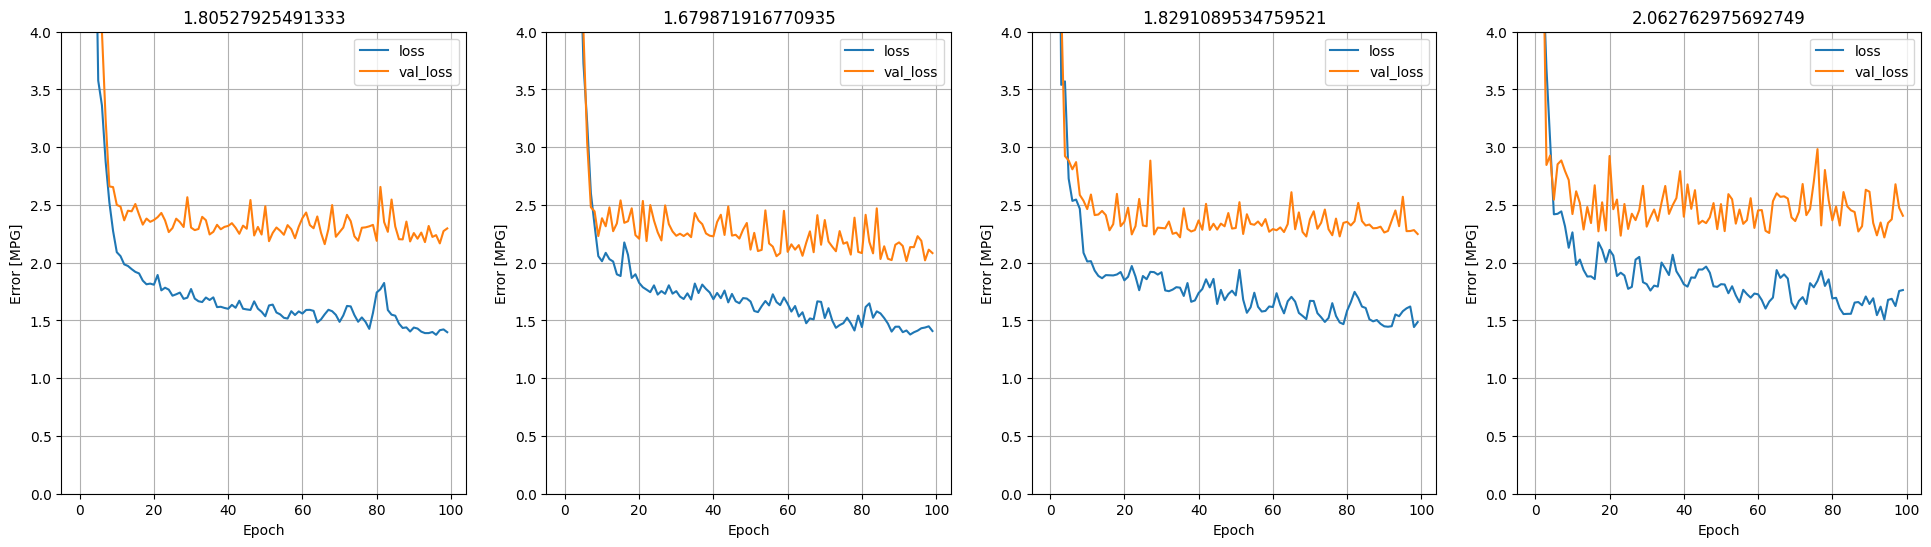

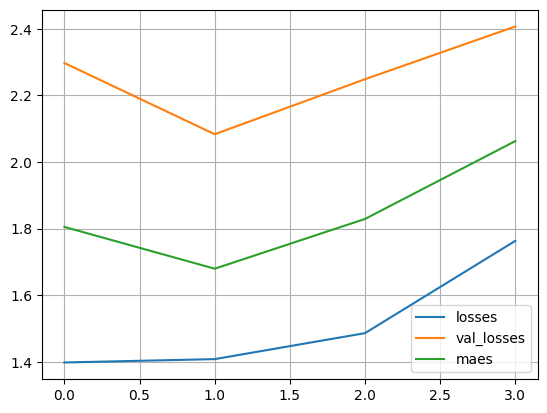

In [44]:
hists = []
maes = []
for degree in [1, 2, 3, 4]:
    hist, mae = fit_with_params(degree=degree, layers=[128, 128, 128])
    hists.append(hist)
    maes.append(mae)
    # print(f"degree {degree} done...")
plot_losses(hists, maes)
losses = []
val_losses = []
for hist in hists:
    losses.append(hist.history['loss'][-1])
    val_losses.append(hist.history['val_loss'][-1])
plt.plot(losses, label="losses")
plt.plot(val_losses, label="val_losses")
plt.plot(maes, label="maes")
plt.legend()
plt.grid(True)
plt.show()
